# Navigation

---

In this notebook, you will learn how to use the Unity ML-Agents environment for the first project of the [Deep Reinforcement Learning Nanodegree](https://www.udacity.com/course/deep-reinforcement-learning-nanodegree--nd893).

### 1. Start the Environment

We begin by importing some necessary packages.  If the code cell below returns an error, please revisit the project instructions to double-check that you have installed [Unity ML-Agents](https://github.com/Unity-Technologies/ml-agents/blob/master/docs/Installation.md) and [NumPy](http://www.numpy.org/).

In [1]:

from unityagents import UnityEnvironment
import numpy as np
from collections import deque
import matplotlib.pyplot as plt
import torch
from dqn_agent import Agent





Next, we will start the environment!  **_Before running the code cell below_**, change the `file_name` parameter to match the location of the Unity environment that you downloaded.

- **Mac**: `"path/to/Banana.app"`
- **Windows** (x86): `"path/to/Banana_Windows_x86/Banana.exe"`
- **Windows** (x86_64): `"path/to/Banana_Windows_x86_64/Banana.exe"`
- **Linux** (x86): `"path/to/Banana_Linux/Banana.x86"`
- **Linux** (x86_64): `"path/to/Banana_Linux/Banana.x86_64"`
- **Linux** (x86, headless): `"path/to/Banana_Linux_NoVis/Banana.x86"`
- **Linux** (x86_64, headless): `"path/to/Banana_Linux_NoVis/Banana.x86_64"`

For instance, if you are using a Mac, then you downloaded `Banana.app`.  If this file is in the same folder as the notebook, then the line below should appear as follows:
```
env = UnityEnvironment(file_name="Banana.app")
```

In [2]:
env = UnityEnvironment(file_name="Banana_Windows_x86_64/Banana.exe")

INFO:unityagents:
'Academy' started successfully!
Unity Academy name: Academy
        Number of Brains: 1
        Number of External Brains : 1
        Lesson number : 0
        Reset Parameters :
		
Unity brain name: BananaBrain
        Number of Visual Observations (per agent): 0
        Vector Observation space type: continuous
        Vector Observation space size (per agent): 37
        Number of stacked Vector Observation: 1
        Vector Action space type: discrete
        Vector Action space size (per agent): 4
        Vector Action descriptions: , , , 


Environments contain **_brains_** which are responsible for deciding the actions of their associated agents. Here we check for the first brain available, and set it as the default brain we will be controlling from Python.

In [3]:
# get the default brain
brain_name = env.brain_names[0]
brain = env.brains[brain_name]

### 2. Examine the State and Action Spaces

The simulation contains a single agent that navigates a large environment.  At each time step, it has four actions at its disposal:
- `0` - walk forward 
- `1` - walk backward
- `2` - turn left
- `3` - turn right

The state space has `37` dimensions and contains the agent's velocity, along with ray-based perception of objects around agent's forward direction.  A reward of `+1` is provided for collecting a yellow banana, and a reward of `-1` is provided for collecting a blue banana. 

Run the code cell below to print some information about the environment.

In [4]:
# reset the environment
from dqn_agent import Agent
env_info = env.reset(train_mode=False)[brain_name]

# number of agents in the environment
print('Number of agents:', len(env_info.agents))

# number of actions
action_size = brain.vector_action_space_size
print('Number of actions:', action_size)

# examine the state space 
state = env_info.vector_observations[0]
print('States look like:', state)
state_size = len(state)
print('States have length:', state_size)

Number of agents: 1
Number of actions: 4
States look like: [1.         0.         0.         0.         0.84408134 0.
 0.         1.         0.         0.0748472  0.         1.
 0.         0.         0.25755    1.         0.         0.
 0.         0.74177343 0.         1.         0.         0.
 0.25854847 0.         0.         1.         0.         0.09355672
 0.         1.         0.         0.         0.31969345 0.
 0.        ]
States have length: 37


### 3. Take Random Actions in the Environment

In the next code cell, you will learn how to use the Python API to control the agent and receive feedback from the environment.

Once this cell is executed, you will watch the agent's performance, if it selects an action (uniformly) at random with each time step.  A window should pop up that allows you to observe the agent, as it moves through the environment.  

Of course, as part of the project, you'll have to change the code so that the agent is able to use its experience to gradually choose better actions when interacting with the environment!

In [8]:

env_info = env.reset(train_mode=False)[brain_name] # reset the environment
state = env_info.vector_observations[0]            # get the current state
score = 0                                          # initialize the score
runs = 0
while True:
    action = agent.act(state)        # select an action
    env_info = env.step(action.astype(int))[brain_name]       # send the action to the environment
    next_state = env_info.vector_observations[0]   # get the next state
    reward = env_info.rewards[0]                   # get the reward
    done = env_info.local_done[0]                  # see if episode has finished
    score += reward                                # update the score
    state = next_state                             # roll over the state to next time step
    runs = runs+ 1;
    if done:                                       # exit loop if episode finished
        break
    
print("Score: {}".format(score))


Score: 8.0
300


When finished, you can close the environment.

In [12]:
env.close()

### 4. It's Your Turn!

Now it's your turn to train your own agent to solve the environment!  When training the environment, set `train_mode=True`, so that the line for resetting the environment looks like the following:
```python
env_info = env.reset(train_mode=True)[brain_name]
```

In [1]:
from unityagents import UnityEnvironment
import numpy as np
from collections import deque
import matplotlib.pyplot as plt
import torch
from dqn_agent import Agent

In [2]:
env = UnityEnvironment(file_name="Banana_Windows_x86_64/Banana.exe")

INFO:unityagents:
'Academy' started successfully!
Unity Academy name: Academy
        Number of Brains: 1
        Number of External Brains : 1
        Lesson number : 0
        Reset Parameters :
		
Unity brain name: BananaBrain
        Number of Visual Observations (per agent): 0
        Vector Observation space type: continuous
        Vector Observation space size (per agent): 37
        Number of stacked Vector Observation: 1
        Vector Action space type: discrete
        Vector Action space size (per agent): 4
        Vector Action descriptions: , , , 


In [3]:
# get the default brain
brain_name = env.brain_names[0]
brain = env.brains[brain_name]

In [4]:
def dqn(n_episodes=3000, max_t=300, eps_start=1.0, eps_end=0.01, eps_decay=0.995):
    scores_window = deque(maxlen=100)
    scores = [] 
    reward = 0
    env_info = env.reset(train_mode=True)[brain_name]  # reset the environment
    state = env_info.vector_observations[0]            # get the current state                      
    eps = eps_start                                    # initialize epsilon  
    state_size = len(state)
    action_size = brain.vector_action_space_size
    agent = Agent(state_size, action_size, seed=0)
    for i_episode in range(1, n_episodes+1):
        env_info = env.reset(train_mode=True)[brain_name]
        score = 0
        for t in range(max_t):
            action = agent.act(state, eps)
            env_info = env.step(action.astype(int))[brain_name]  
            next_state = env_info.vector_observations[0]   # get the next state
            reward = env_info.rewards[0]                   # get the reward
            done = env_info.local_done[0]
            agent.step(state, action, reward, next_state, done)
            state = next_state
            score += reward
            if done:
                break 
        scores_window.append(score)       # save most recent score
        scores.append(score)              # save most recent score
        eps = max(eps_end, eps_decay*eps) # decrease epsilon
        if i_episode % 10 == 0:
            print("{}th score: {}".format(i_episode,score)) #prints the score for every 10th run
        if np.mean(scores_window)>=15:
            print('\nEnvironment solved in {:d} episodes!\tAverage Score: {:.2f}'.format(i_episode, np.mean(scores_window)))
            torch.save(agent.qnetwork_local.state_dict(), 'model.pt')
            break
    torch.save(agent.qnetwork_local.state_dict(), 'model.pt')
    return scores


In [5]:
scores = dqn() #Starts training
env.close()    #Closes the enviroment

10th score: 1.0
20th score: -1.0
30th score: -2.0
40th score: 0.0
50th score: -1.0
60th score: -4.0
70th score: -4.0
80th score: -5.0
90th score: -1.0
100th score: 1.0
110th score: -1.0
120th score: 1.0
130th score: 2.0
140th score: 2.0
150th score: 4.0
160th score: 1.0
170th score: 1.0
180th score: 5.0
190th score: -1.0
200th score: 3.0
210th score: -2.0
220th score: 6.0
230th score: -2.0
240th score: 2.0
250th score: 5.0
260th score: 3.0
270th score: 2.0
280th score: -1.0
290th score: 6.0
300th score: 1.0
310th score: 3.0
320th score: 5.0
330th score: 0.0
340th score: 1.0
350th score: 3.0
360th score: 4.0
370th score: 4.0
380th score: 9.0
390th score: 4.0
400th score: 5.0
410th score: 3.0
420th score: 4.0
430th score: 1.0
440th score: 1.0
450th score: 3.0
460th score: 2.0
470th score: 2.0
480th score: 4.0
490th score: 1.0
500th score: 8.0
510th score: 1.0
520th score: 6.0
530th score: 1.0
540th score: 4.0
550th score: 4.0
560th score: 5.0
570th score: 2.0
580th score: 7.0
590th score

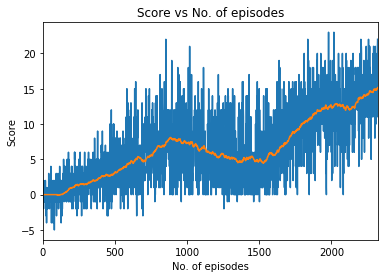

In [7]:
nEpisodes = len(scores)
size = 100
Episodes = list(range(nEpisodes ))
plt.plot(Episodes,scores) #plots the scores
SMA = [0]*nEpisodes 
for x in range(nEpisodes ):
    if x+1 > size:
        SMA[x] = sum(scores[(x-size):x + 1])/size
        
plt.plot(Episodes,SMA)  #plots SMA
plt.xlim(0,nEpisodes )
plt.xlabel("No. of episodes")
plt.ylabel("Score")
plt.title("Score vs No. of episodes")
plt.savefig('Result.png',bbox_inches="tight")